## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn import tree

# wordcloud drawing
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

Ссылка на датасет с отзывами https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews

Ссылка на датасет с данными оттока пользователей https://www.kaggle.com/c/advanced-dls-spring-2021/

In [2]:
WORDCLOUD_STOPWORDS = set(STOPWORDS)
RATING_DATA_FILE_PATH = "D:/Универ/Bachelor/ИДПО 2022/Проект отзывы/archive (4)/Books_rating.csv"
CHURN_DATA_FILE_PATH = './train.csv'

## Равномерная шкала и логарифмическая

Пусть в датасете объект `first` встретился $10\_000$ раз, объекты `second` и `third` - $10$ и $5$ раз соответственно.

In [3]:
lst_x = ['first', 'second', 'third']
lst_y = [10_000, 10, 5]

Отрисуем столбчатую диаграмму с равномерной шкалой.

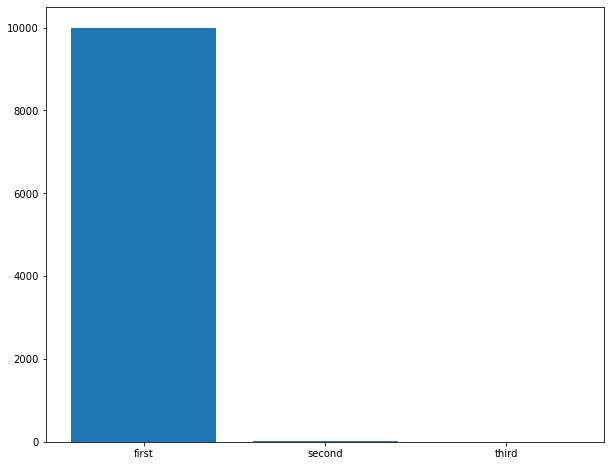

In [4]:
plt.figure(figsize=(10, 8))
plt.bar(x=lst_x, height=lst_y);

Численность объектов `second` и `third` не видна.

Отрисуем столбчатую диаграмму с логарифмической (экспоненциальной) шкалой: установим параметр `log` в значение `True`.

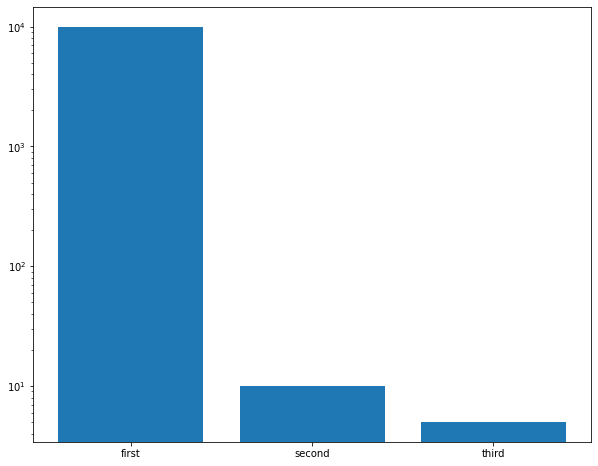

In [5]:
plt.figure(figsize=(10, 8))
plt.bar(x=lst_x, height=lst_y, log=True);

Для сравнения поместим эти диаграммы рядом.

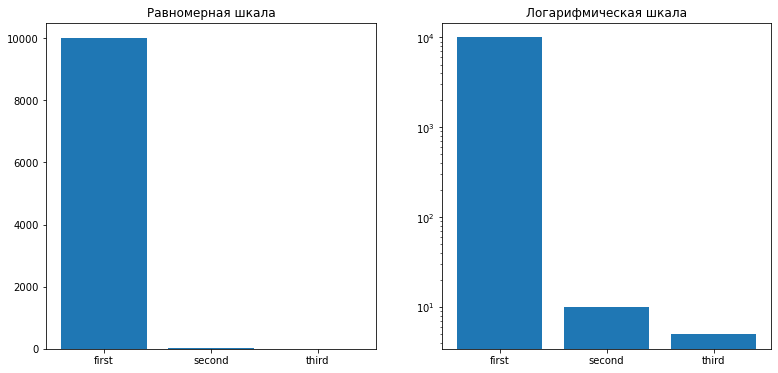

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].set_title('Равномерная шкала')
axs[0].bar(x=lst_x, height=lst_y)

axs[1].set_title('Логарифмическая шкала')
axs[1].bar(x=lst_x, height=lst_y, log=True);

Этот параметр также можно устанавливать и для гистограмм.

## Установка предельных значений по осям

Возьмем три группы с двух различных факультетов. На одном группы более многочисленны, чем на другом.

In [7]:
lst_1 = [25, 27, 30]
lst_2 = [10, 12, 9]
lst_group_names = ['group_1', 'group_2', 'group_3']

Отрисуем столбчатые диаграммы.

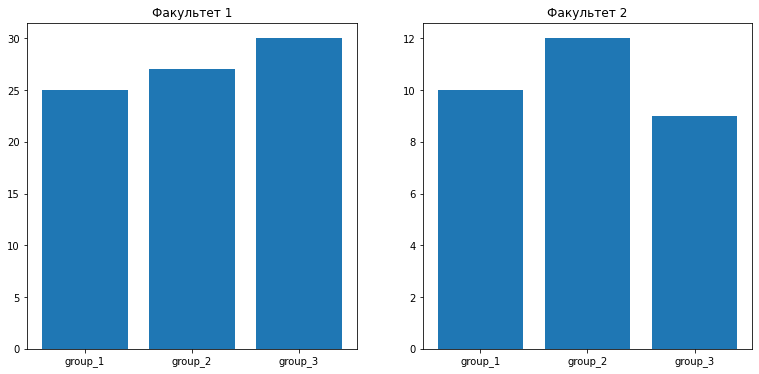

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].set_title('Факультет 1')
axs[0].bar(x=lst_group_names, height=lst_1)

axs[1].set_title('Факультет 2')
axs[1].bar(x=lst_group_names, height=lst_2);

Первое впечатление - численность групп примерно одинакова. Однако ось абсцисс на первом графике имеет верхний предел $30$, а на втором - $12$, что незаметно при быстром просмотре.

Для наглядности лучше установить одинаковые пределы по осям.

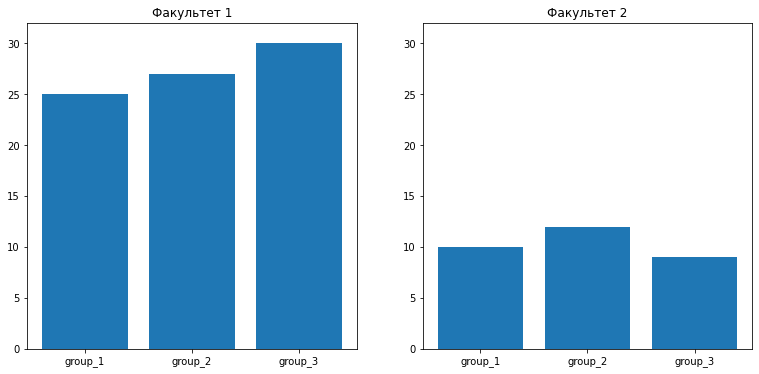

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].set_title('Факультет 1')
axs[0].set_ylim(0, 32)
axs[0].bar(x=lst_group_names, height=lst_1)

axs[1].set_title('Факультет 2')
axs[1].set_ylim(0, 32)
axs[1].bar(x=lst_group_names, height=lst_2);

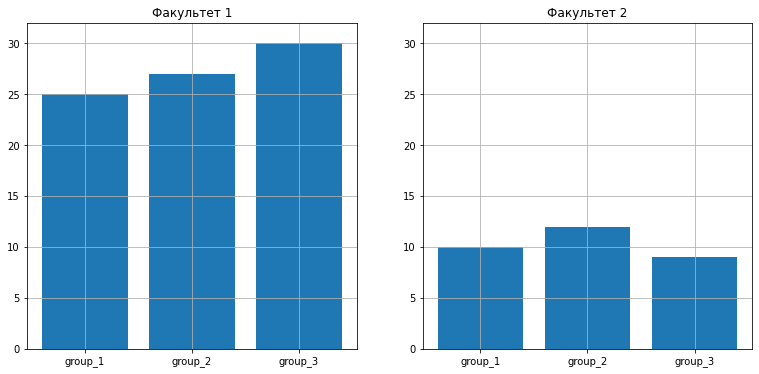

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

axs[0].set_title('Факультет 1')
axs[0].set_ylim(0, 32)
axs[0].grid(True)
axs[0].bar(x=lst_group_names, height=lst_1)

axs[1].set_title('Факультет 2')
axs[1].set_ylim(0, 32)
axs[1].grid(True)
axs[1].bar(x=lst_group_names, height=lst_2);

## Отрисовка однотипных диаграмм

In [11]:
df = pd.read_csv(CHURN_DATA_FILE_PATH)

In [12]:
df.sample(n=5, random_state=42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0


In [13]:
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

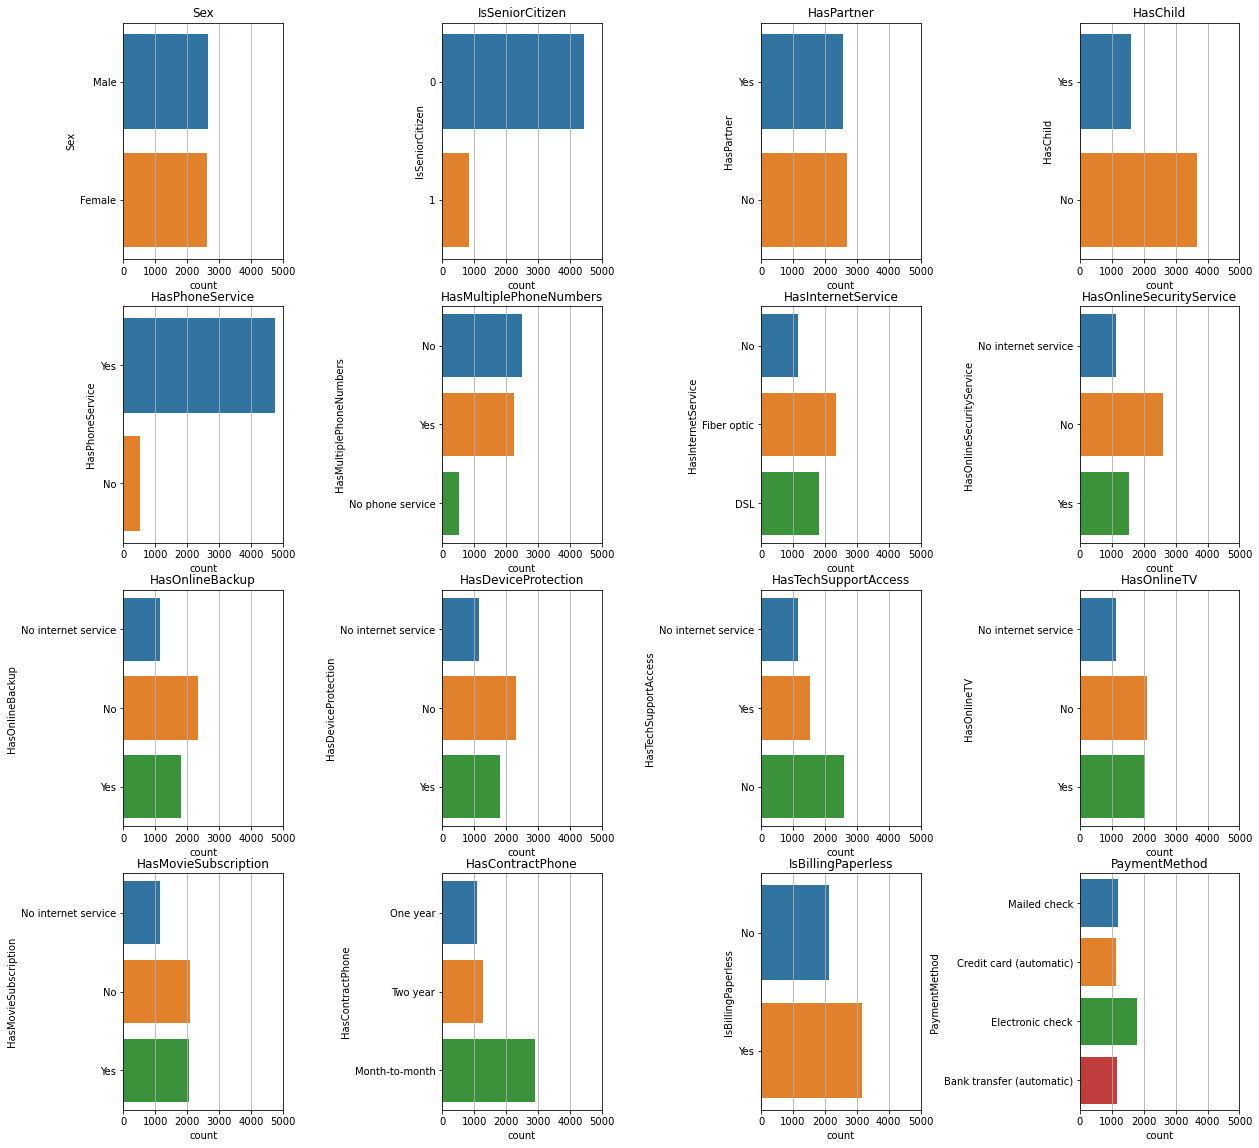

In [14]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.2, wspace=1)

# счетчик графиков
i = 0

for i in range(len(cat_cols)):
    ax_ = fig.add_subplot(4, 4, i + 1)
    ax_.grid(True)
    ax_.set_xlim(0, 5_000)
    sns.countplot(ax=ax_, y=df[cat_cols[i]])
    ax_.set_title(cat_cols[i])
    i += 1

## Столбчатая диаграмма для пары категориальных признаков

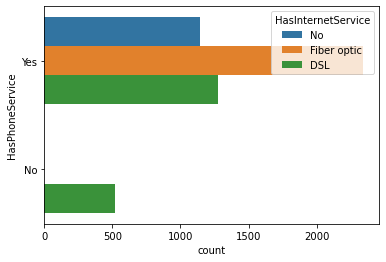

In [15]:
sns.countplot(y=df.HasPhoneService, hue=df.HasInternetService);

## Диаграмма “ящик с усами” (boxplot)

Диаграмма “ящик с усами” позволяет одновременно увидеть несколько разных характеристик переменной: медиану, квантили и выбросы.

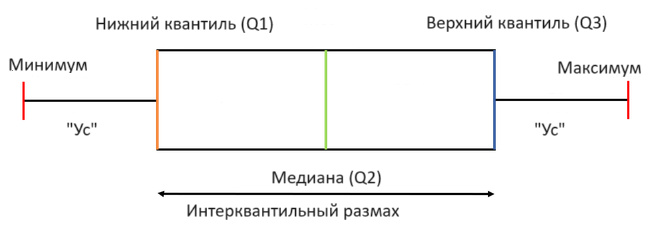

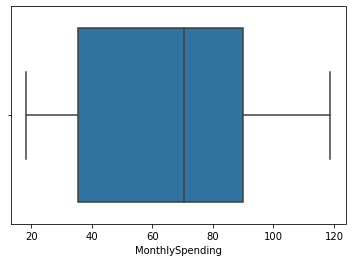

In [16]:
sns.boxplot(x=df.MonthlySpending);

На одном графике можно посмотреть числовые характеристика для различных значений категориального признака

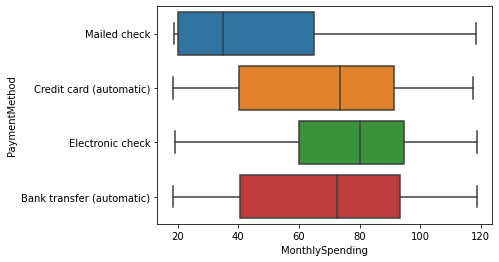

In [17]:
sns.boxplot(x=df.MonthlySpending, y=df.PaymentMethod);

## Диаграммы разброса для визуализации зависимостей числовых признаков

In [18]:
X, target = datasets.load_iris(return_X_y=True, as_frame=True)
display(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Откладываем один из признаков по оси абсцисс, другой - по оси ординат

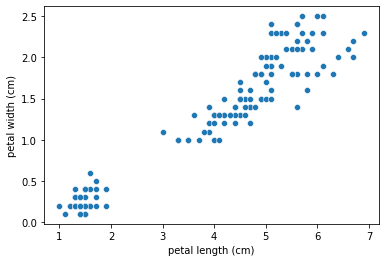

In [19]:
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)');

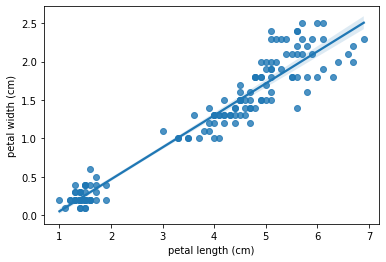

In [20]:
sns.regplot(data=X, x='petal length (cm)', y='petal width (cm)');

Можно добавить парметр оттенка, который соотнесет цвета с классами категориального признака.

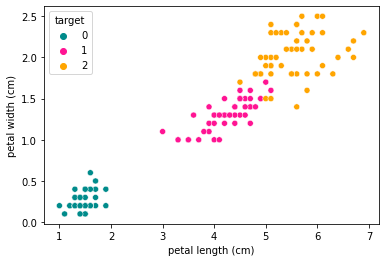

In [21]:
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', 
                hue=target, palette=sns.color_palette(['darkcyan', 'deeppink', 'orange']));

## Теплокарта

### Пропуски

In [22]:
df = pd.read_csv(RATING_DATA_FILE_PATH, nrows=10_000)
df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
9995,0714843016,Fish Face,NaN,AKI17M38FBHO3,Mary Ann Payne,0/0,5.0,1253750400,fish face,Many books I buy are to keep my gradeschool gr...
9996,0714843016,Fish Face,NaN,A23RC1806MU14U,"Jay E. Schwartz ""livediver""",0/0,5.0,1215648000,fish book faces,awesome pics beleive it there int he sea we kn...
9997,0714843016,Fish Face,NaN,A1T38WUVN5DHOW,A. Gorozdos,0/0,3.0,1181433600,Great pictures!,This book has wonderful pictures but I think i...
9998,0714843016,Fish Face,NaN,A3KPR36IFBPAPE,G'town mom,0/0,5.0,1168300800,"best book ever, picture or otherwise",we bought this book first at the monterey aqua...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  10000 non-null  object 
 1   Title               10000 non-null  object 
 2   Price               1414 non-null   float64
 3   User_id             8117 non-null   object 
 4   profileName         8117 non-null   object 
 5   review/helpfulness  10000 non-null  object 
 6   review/score        10000 non-null  float64
 7   review/time         10000 non-null  int64  
 8   review/summary      10000 non-null  object 
 9   review/text         10000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


In [24]:
df.isna().sum()

Id                       0
Title                    0
Price                 8586
User_id               1883
profileName           1883
review/helpfulness       0
review/score             0
review/time              0
review/summary           0
review/text              0
dtype: int64

Проценты пропусков по колонкам

In [25]:
df.isna().sum() / df.shape[0] * 100

Id                     0.00
Title                  0.00
Price                 85.86
User_id               18.83
profileName           18.83
review/helpfulness     0.00
review/score           0.00
review/time            0.00
review/summary         0.00
review/text            0.00
dtype: float64

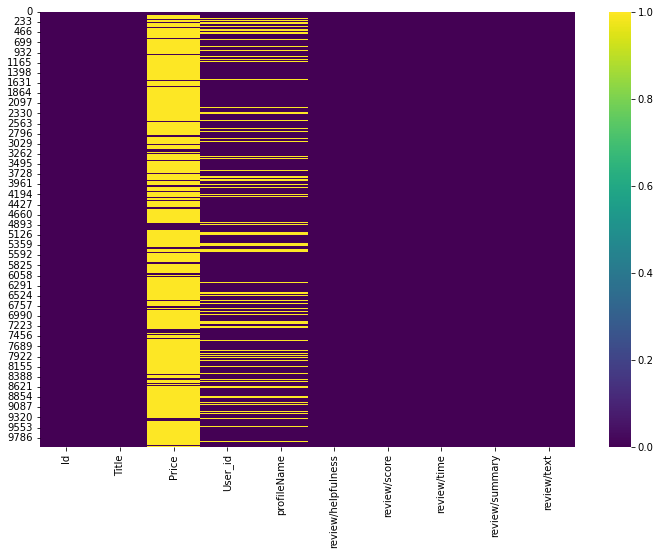

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cmap='viridis');

### Корреляционная матрица

In [27]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
display(X)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
corr_matrix = pd.DataFrame.corr(X)
display(corr_matrix)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


`annot=True` - подписываем коэффициенты корреляции

`cmap="coolwarm"` - используем дивергентную палитру

`center=0` - центрируем, чтобы одинаковые по модулю значения были окрашены в цвета одинаковой интенсивности

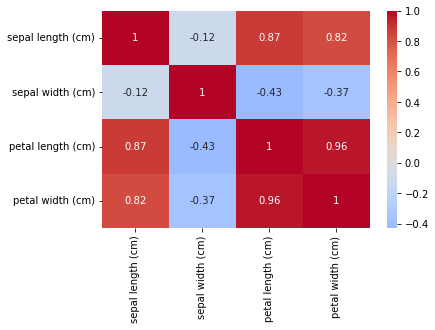

In [29]:
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", center=0);

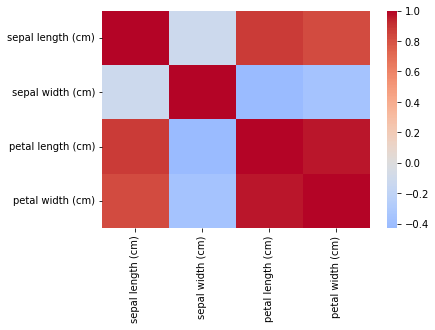

In [30]:
sns.heatmap(data=corr_matrix, annot=False, cmap="coolwarm", center=0);

## Матрица путаниц

*Для заданий на классификацию. Можно также приспособить для кластеризации, где известно истинное разбиение.*

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [31]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
display(X)
display(y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [33]:
clf = svm.SVC(kernel="linear", C=0.01)
clf.fit(X_train, y_train)
y_pred = predictions = clf.predict(X_test)

Матрица путаниц без нормализации

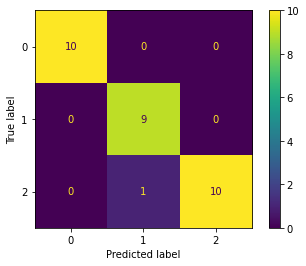

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot();

Нормализованная матрица путаниц

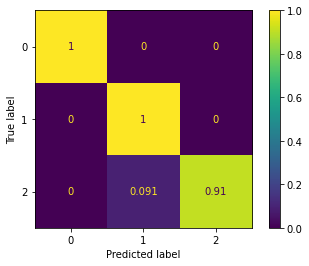

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot();

## Дерево решений

In [36]:
iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(random_state=42)

### Текстовое представление

In [37]:
r = tree.export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### Визуализация

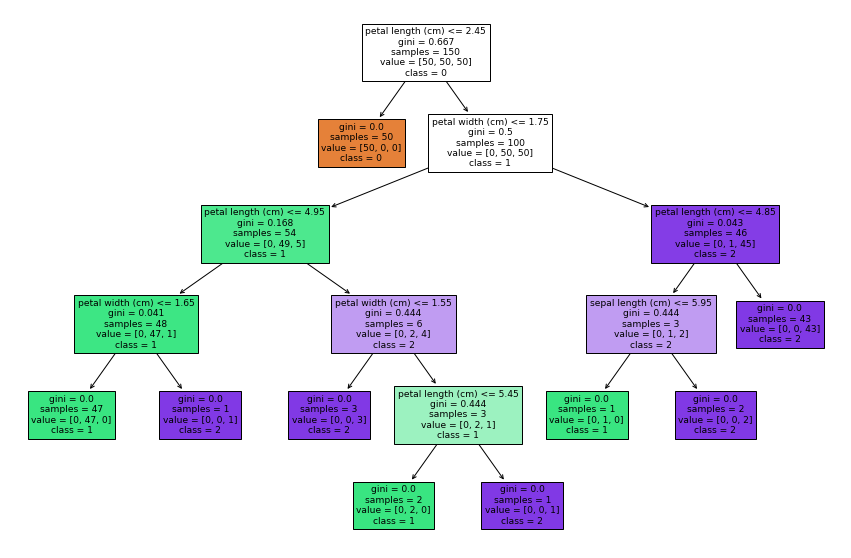

In [38]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=iris['feature_names'], class_names=['0', '1', '2'], filled=True);

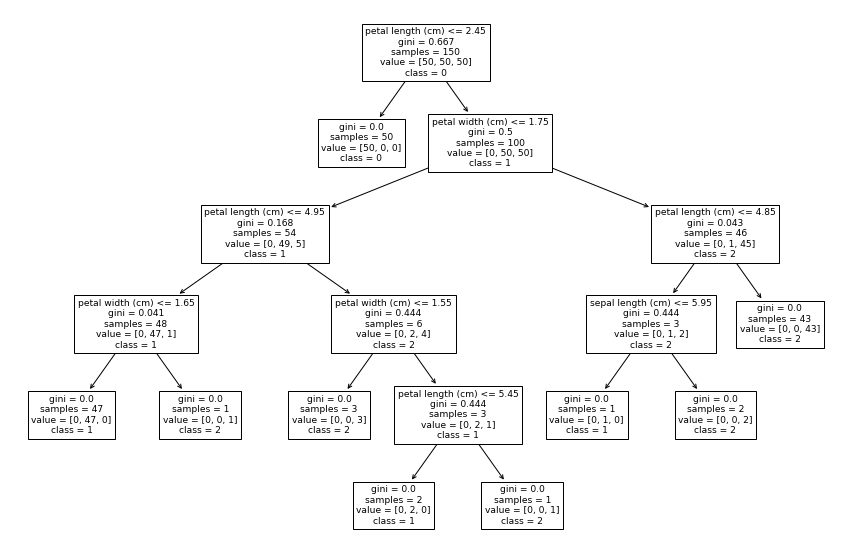

In [39]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=iris['feature_names'], class_names=['0', '1', '2']);

## Облако слов

*Для заданий, связанных с работой с текстами*

In [40]:
df = pd.read_csv(RATING_DATA_FILE_PATH, nrows=10_000)
df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
9995,0714843016,Fish Face,NaN,AKI17M38FBHO3,Mary Ann Payne,0/0,5.0,1253750400,fish face,Many books I buy are to keep my gradeschool gr...
9996,0714843016,Fish Face,NaN,A23RC1806MU14U,"Jay E. Schwartz ""livediver""",0/0,5.0,1215648000,fish book faces,awesome pics beleive it there int he sea we kn...
9997,0714843016,Fish Face,NaN,A1T38WUVN5DHOW,A. Gorozdos,0/0,3.0,1181433600,Great pictures!,This book has wonderful pictures but I think i...
9998,0714843016,Fish Face,NaN,A3KPR36IFBPAPE,G'town mom,0/0,5.0,1168300800,"best book ever, picture or otherwise",we bought this book first at the monterey aqua...


In [41]:
df['review/score'].unique()

array([4., 5., 1., 3., 2.])

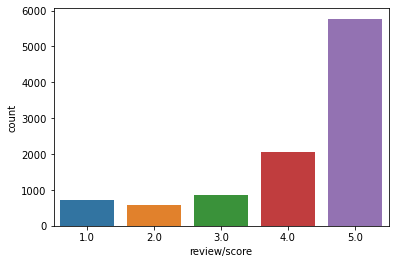

In [42]:
sns.countplot(data=df, x='review/score');

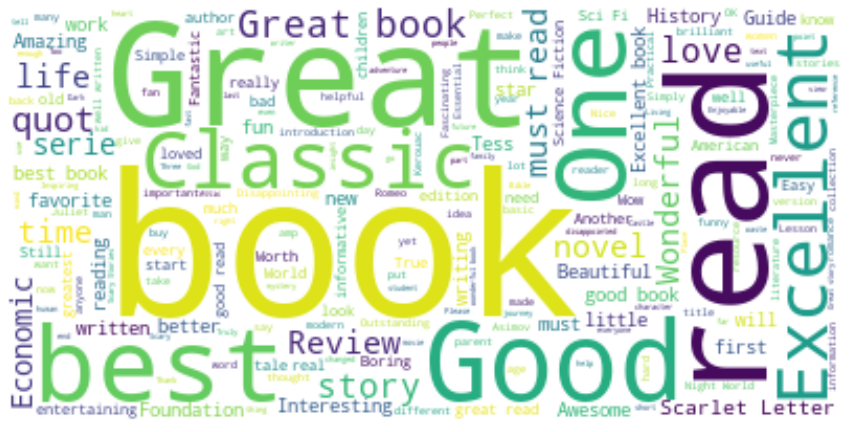

In [43]:
text = " ".join(i for i in df['review/summary'])
wordcloud = WordCloud(stopwords=WORDCLOUD_STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Группировка по отзывам

In [44]:
score_lst = sorted(df['review/score'].unique())

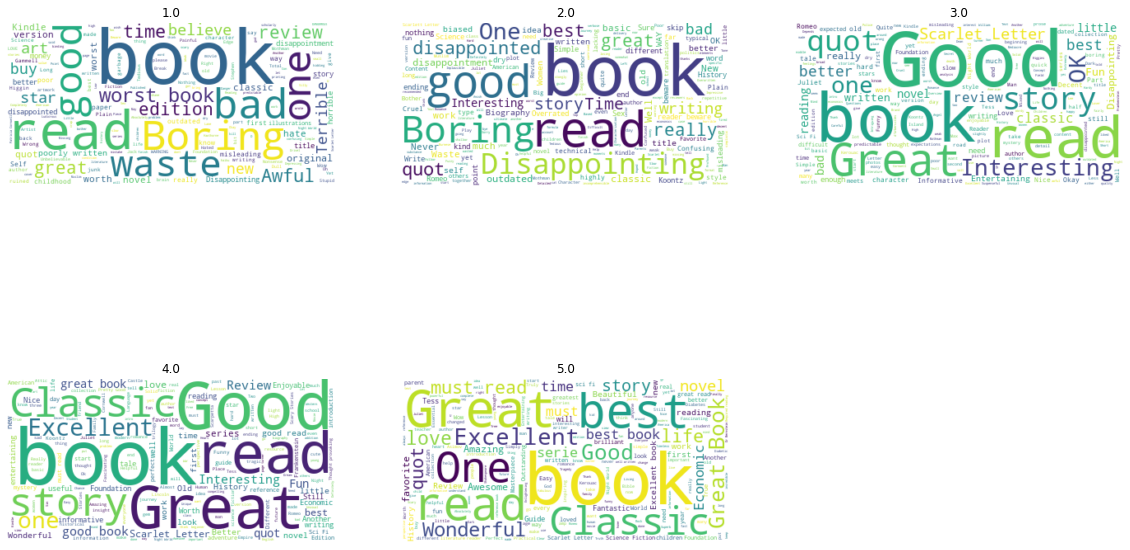

In [45]:
fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust()#(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

genre_count = 4
i = 0

for current_score in score_lst:
    current_df = df[df['review/score'] == current_score]
    ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
    current_text = " ".join(i for i in current_df['review/summary'])
    wordcloud = WordCloud(stopwords=WORDCLOUD_STOPWORDS, background_color="white").generate(current_text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(current_score);
    i += 1

Рейтинг 1

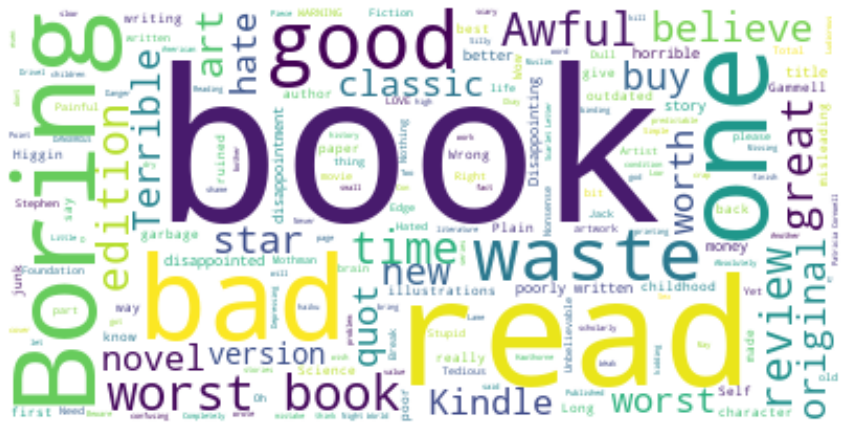

In [46]:
score = score_lst[0]
filtered_df = df[df['review/score'] == score]

text = " ".join(i for i in filtered_df['review/summary'])
wordcloud = WordCloud(stopwords=WORDCLOUD_STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Рейтинг 2

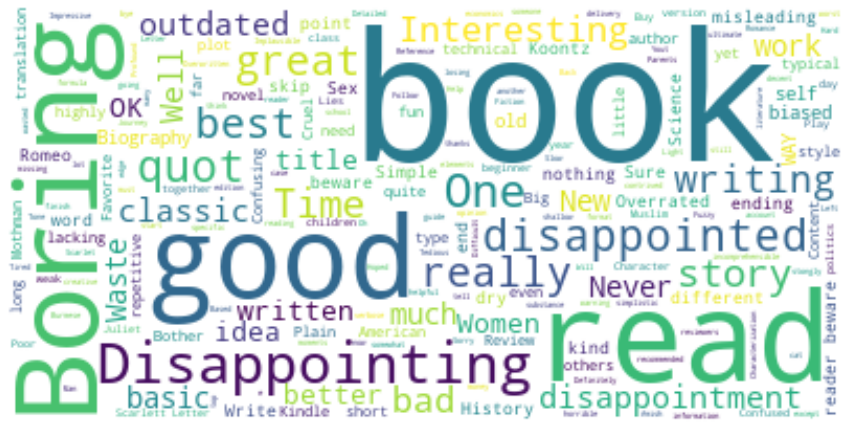

In [47]:
score = score_lst[1]
filtered_df = df[df['review/score'] == score]

text = " ".join(i for i in filtered_df['review/summary'])
wordcloud = WordCloud(stopwords=WORDCLOUD_STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Рейтинг 5

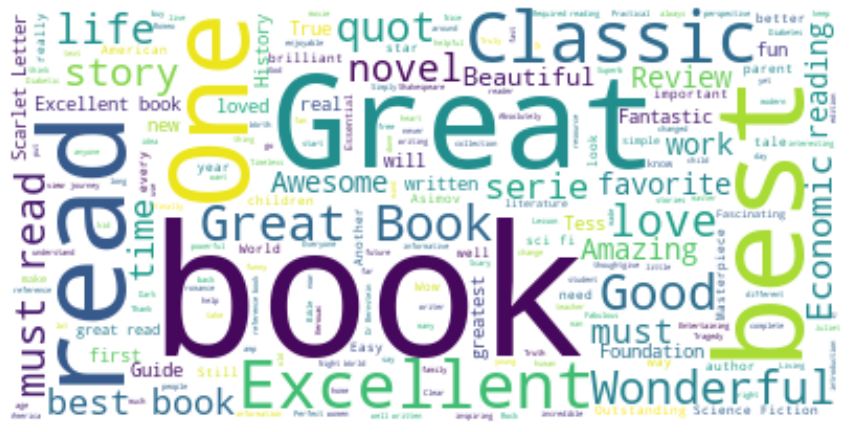

In [48]:
score = score_lst[4]
filtered_df = df[df['review/score'] == score]

text = " ".join(i for i in filtered_df['review/summary'])
wordcloud = WordCloud(stopwords=WORDCLOUD_STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Визуализация рукописных цифр

In [49]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

In [50]:
display(X_digits[:3])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [51]:
display(X_digits.shape)

(1797, 64)

Первые 30

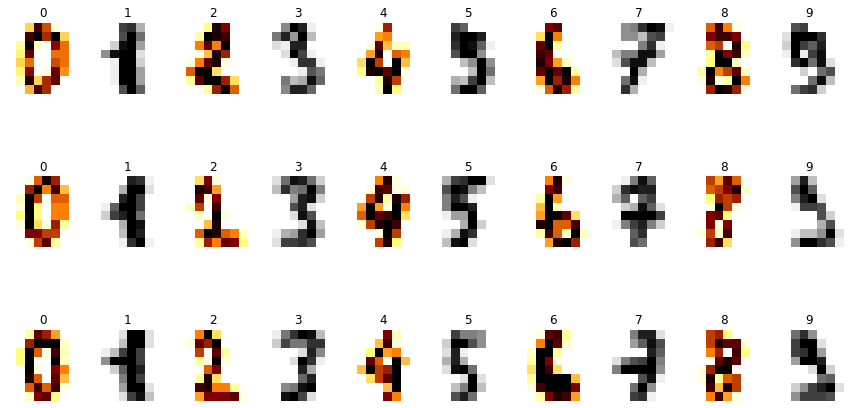

In [52]:
_, axes = plt.subplots(nrows=3, ncols=10, figsize=(15, 8))
for ax, image, label in zip(axes.flatten(), X_digits, y_digits):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)